In [19]:
##################################
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd 
import numpy as np
import random
##################################

In [20]:
df = pd.read_csv("bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [21]:
job = [ "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown"]

for ii in range(len(job)): 
    df.job[df.job == job[ii]] = ii

marital = ["divorced","married","single","unknown"]

for ii in range(len(marital)):
    df.marital[df.marital == marital[ii]] = ii

education =  ["primary","secondary","tertiary","unknown"]

for ii in range(len(education)):
    df.education[df.education == education[ii]] = ii

df.default[df.default == "no" ] = 0
df.default[df.default == "yes" ] = 1

df.housing[df.housing == "no" ] = 0
df.housing[df.housing == "yes" ] = 1

df.loan[df.loan == "no" ] = 0
df.loan[df.loan == "yes" ] = 1

contact = ["telephone","cellular","unknown"] 

for ii in range(len(contact)):
    df.contact[df.contact == contact[ii]] = ii

month = ["jan", "feb", "mar", "apr", "may","jun", "jul", "aug", "sep", "oct","nov", "dec"]

for ii in range(len(month)):
    df.month[df.month == month[ii]] = ii

poutcome = ["other","failure","success", "unknown"]


for ii in range(len(poutcome)):
    df.poutcome[df.poutcome == poutcome[ii]] = ii

df.y[df.y == "no" ] = 0
df.y[df.y == "yes" ] = 1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,1,19,9,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,1,11,4,220,1,339,4,1,0
2,35,4,2,2,0,1350,1,0,1,16,3,185,1,330,1,1,0
3,30,4,1,2,0,1476,1,1,2,3,5,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,4,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,1,30,6,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,4,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,1,19,7,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,1,6,1,129,4,211,3,0,0


In [22]:
sampled = df.sample(1000)
sampled.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2738,39,9,2,2,0,1043,0,0,1,18,7,195,10,-1,0,3,0
1118,60,5,1,1,0,4820,0,0,2,5,5,419,1,-1,0,3,0
3189,54,1,1,0,0,2281,1,0,2,20,5,158,1,-1,0,3,0
92,27,7,2,1,0,-195,1,0,1,18,4,391,1,-1,0,3,1
2918,29,0,2,2,0,14,0,0,1,29,8,87,1,120,1,1,0


[0.08504787 0.06504436 0.04259891 0.0463124  0.01000256 0.08254589
 0.02629408 0.0161125  0.03524189 0.0892378  0.09149423 0.22100204
 0.05932216 0.04434859 0.03120212 0.05419261]


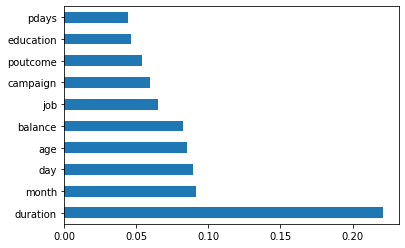

In [26]:

x = sampled.iloc[:, 0:16]
y = sampled.iloc[:, -1]
y = y.astype('int')

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [28]:
new_df = np.array(sampled[['duration','month','day','age','balance']])
new_df

array([[582, 5, 6, 26, 565],
       [219, 10, 20, 35, 725],
       [255, 6, 23, 58, 5920],
       ...,
       [158, 5, 20, 54, 2281],
       [391, 4, 18, 27, -195],
       [87, 8, 29, 29, 14]], dtype=object)

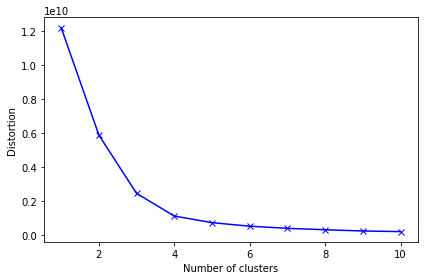

In [29]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(new_df)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()

plt.show()